# opencv
## 제공하는 기능
- 이미지 형식 변환
- 크기 및 색상 변환
- 필터링, 얼굴 인식, 물체 인식, 문자 인식

In [1]:
# 맥에서 opencv (cv2)
!pip install opencv-python

In [2]:
import cv2
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [3]:
# 이미지 읽기
!curl https://raw.githubusercontent.com/StillWork/data/master/pool.jpg \
    -o pool.jpg
img = cv2.imread("pool.jpg")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 13 1587k   13  207k    0     0   207k      0  0:00:07 --:--:--  0:00:07  249k
100 1587k  100 1587k    0     0  1587k      0  0:00:01  0:00:01 --:--:-- 1471k


In [4]:
img

array([[[ 87,  86,  76],
        [ 87,  86,  76],
        [ 88,  88,  76],
        ...,
        [255, 254, 253],
        [255, 254, 253],
        [255, 254, 253]],

       [[ 87,  86,  76],
        [ 87,  86,  76],
        [ 88,  88,  76],
        ...,
        [255, 254, 253],
        [255, 254, 253],
        [255, 254, 253]],

       [[ 87,  86,  76],
        [ 87,  86,  76],
        [ 87,  87,  75],
        ...,
        [255, 254, 253],
        [255, 254, 253],
        [255, 254, 253]],

       ...,

       [[ 73,  80,  89],
        [ 72,  79,  88],
        [ 72,  79,  88],
        ...,
        [204, 180, 104],
        [204, 180, 104],
        [204, 180, 104]],

       [[ 72,  79,  88],
        [ 72,  79,  88],
        [ 72,  79,  88],
        ...,
        [204, 180, 104],
        [203, 179, 103],
        [203, 179, 103]],

       [[ 72,  79,  88],
        [ 72,  79,  88],
        [ 72,  79,  88],
        ...,
        [204, 180, 104],
        [203, 179, 103],
        [202, 178, 102]]

In [5]:
type(img)

numpy.ndarray

In [6]:
img.shape

(3024, 4032, 3)

In [7]:
img.min(), img.max()

(0, 255)

## 이미지를 그림으로 출력하기

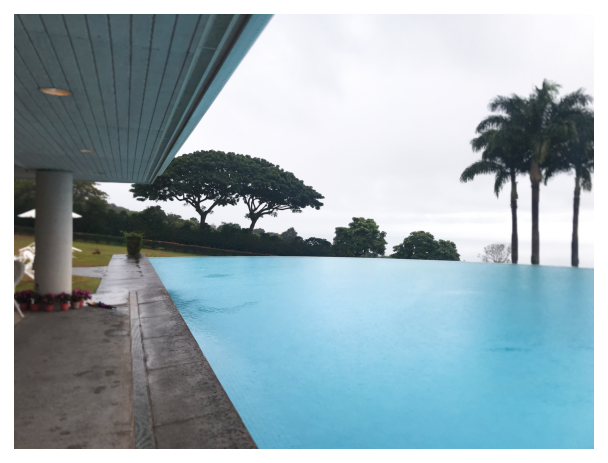

In [8]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

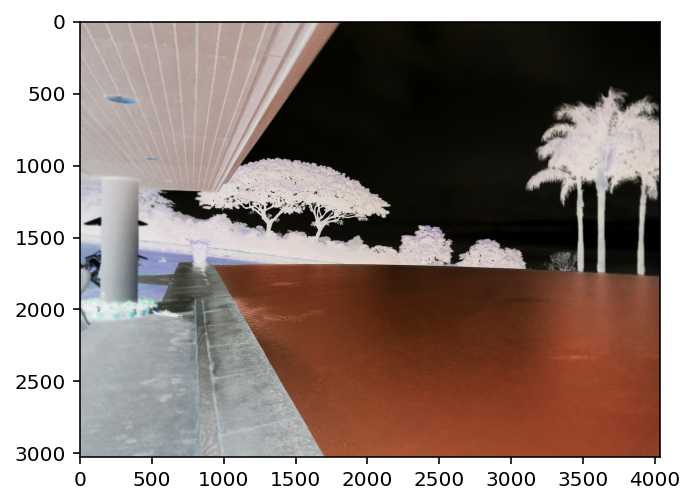

In [9]:
# 반전(네거티브) 처리
img2 = 255 - img
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

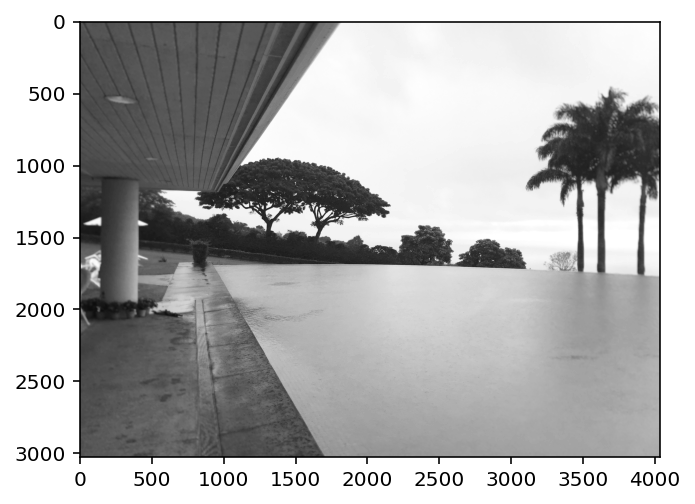

In [10]:
# 그레이로 변환
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img2, cmap='gray')

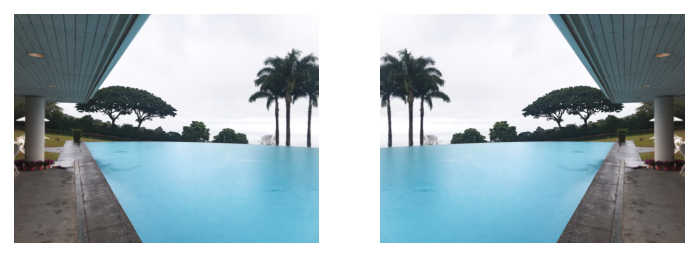

In [11]:
# 좌우 반전하기

plt.subplot(1,2,1)
plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
img2 = cv2.flip(img, 1)

plt.subplot(1,2,2)
plt.axis("off")
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

## 저장하기

In [12]:
cv2.imwrite("pool_2.jpg", img)

True

## 크기 자르기

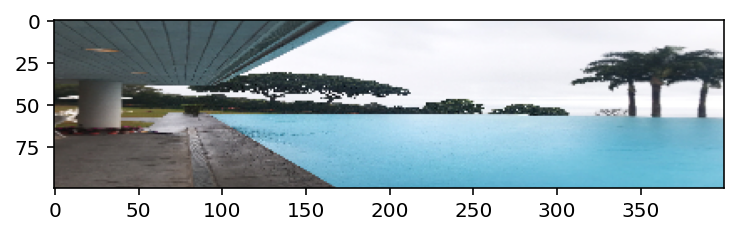

In [13]:
# 폭과 높이 조정
im2 = cv2.resize(img, (400, 100))
plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
plt.axis("on")
plt.show()

In [14]:
img.shape

(3024, 4032, 3)

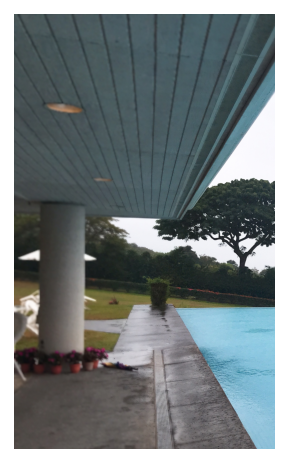

In [15]:
# 슬라이스
im2 = img[0:2500, 0:1500]
plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

# 얼굴을 검출하는 기능
- Haar-like 특징 학습기 사용한다. 눈, 코, 입 부분의 명암의 패턴을 인식
- 얼굴 특징 데이터베이스인 캐스케이드 파일 필요 (haarcascade 검색하면 됨
- https://github.com/opencv/opencv/tree/master/data/haarcascades


In [16]:
!curl -L https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_alt.xml \
    -o haar.xml

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
 11  660k   11 81061    0     0  40530      0  0:00:16  0:00:02  0:00:14  126k
100  660k  100  660k    0     0   330k      0  0:00:02  0:00:02 --:--:--  846k


In [17]:
!ls -al ha*

'ls'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [18]:
 !type -50 haar.xml

<?xml version="1.0"?>
<!--
    Stump-based 20x20 gentle adaboost frontal face detector.
    Created by Rainer Lienhart.

////////////////////////////////////////////////////////////////////////////////////////

  IMPORTANT: READ BEFORE DOWNLOADING, COPYING, INSTALLING OR USING.

  By downloading, copying, installing or using the software you agree to this license.
  If you do not agree to this license, do not download, install,
  copy or use the software.


                        Intel License Agreement
                For Open Source Computer Vision Library

 Copyright (C) 2000, Intel Corporation, all rights reserved.
 Third party copyrights are property of their respective owners.

 Redistribution and use in source and binary forms, with or without modification,
 are permitted provided that the following conditions are met:

   * Redistribution's of source code must retain the above copyright notice,
     this list of conditions and the following disclaimer.

   * Redistribution's i

������ ������ ã�� �� �����ϴ�.
���� ���� ���� �� ���� �߻�: -50.

haar.xml




            0 -1 80 1.6790600493550301e-03</internalNodes>
          <leafValues>
            5.8519971370697021e-01 1.2553839385509491e-01</leafValues></_>
        <_>
          <internalNodes>
            0 -1 81 6.9827912375330925e-04</internalNodes>
          <leafValues>
            9.4018429517745972e-02 5.7289612293243408e-01</leafValues></_>
        <_>
          <internalNodes>
            0 -1 82 7.8959012171253562e-04</internalNodes>
          <leafValues>
            1.7819879949092865e-01 5.6943088769912720e-01</leafValues></_>
        <_>
          <internalNodes>
            0 -1 83 -2.8560499195009470e-03</internalNodes>
          <leafValues>
            1.6383990645408630e-01 5.7886648178100586e-01</leafValues></_>
        <_>
          <internalNodes>
            0 -1 84 -3.8122469559311867e-03</internalNodes>
          <leafValues>
            2.0854400098323822e-01 5.5085647106170654e-01</leafValues></_>
        <_>
          <internalNodes>
            0 -1 85 1.5

In [19]:
# 캐스케이드 파일 지정해서 검출기 생성
cascade_file = "haar.xml"
cascade = cv2.CascadeClassifier(cascade_file)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1733k  100 1733k    0     0  1733k      0  0:00:01 --:--:--  0:00:01 3083k


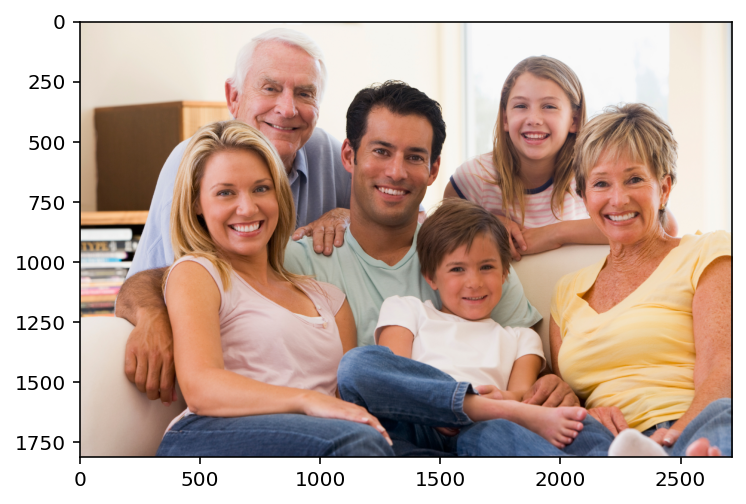

In [23]:
!curl https://raw.githubusercontent.com/StillWork/data/master/families.jpg\
    -o families.jpg
# img = cv2.imread("c:\pic\myfamilies.jpg")
img = cv2.imread("families.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

얼굴의 좌표 = 672 142 385 385
얼굴의 좌표 = 1128 393 396 396
얼굴의 좌표 = 1735 233 312 312
얼굴의 좌표 = 1467 904 325 325
얼굴의 좌표 = 2065 533 352 352
얼굴의 좌표 = 481 552 396 396


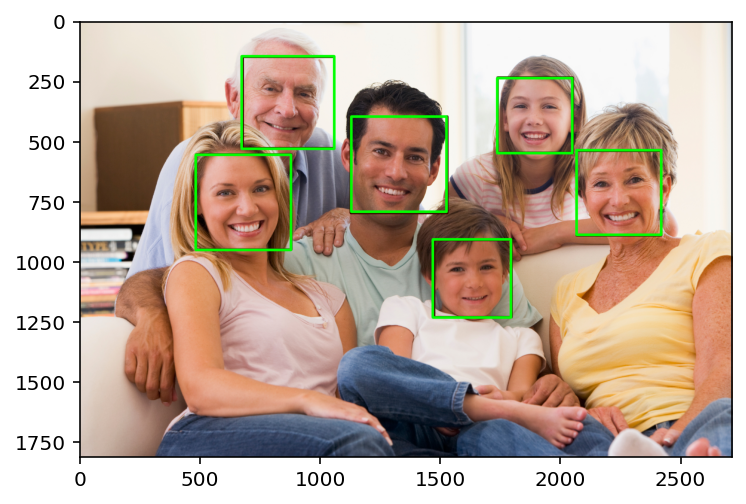

In [25]:
# 얼굴 인식하기



img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))

# 결과 확인하기
if len(face_list) == 0:
    print("얼굴 인식 실패")
    quit()
# 인식한 부분 표시하기
for (x,y,w,h) in face_list:
    print("얼굴의 좌표 =", x, y, w, h)
    red = (0, 255, 0)
    cv2.rectangle(img, (x, y), (x+w, y+h),red, thickness=10)

# 이미지 출력하기
cv2.imwrite("face-detect.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

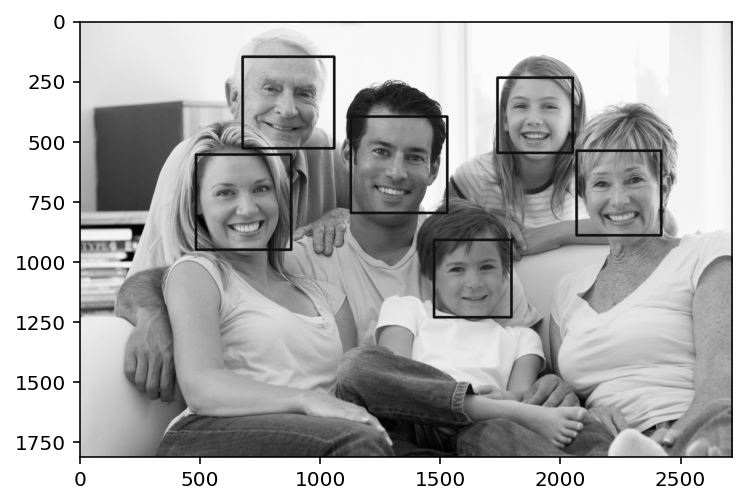

In [26]:
# 그레이 이미지로 출력하기
slice = img_gray[x:x+w, y:y+h]
cv2.imwrite("face-pickup.png", slice)
plt.imshow(img_gray, cmap="gray")
plt.show()

In [27]:
def mosaic(img, rect, size):
    # 모자이크 적용할 부분 추출하기
    (x1, y1, x2, y2) = rect
    w = x2 - x1
    h = y2 - y1
    i_rect = img[y1:y2, x1:x2]
    # 축소하고 확대하기
    i_small = cv2.resize(i_rect, ( size, size))
    i_mos = cv2.resize(i_small, (w, h), interpolation=cv2.INTER_AREA)
    # 모자이크 적용하기
    img2 = img.copy()
    img2[y1:y2, x1:x2] = i_mos
    return img2

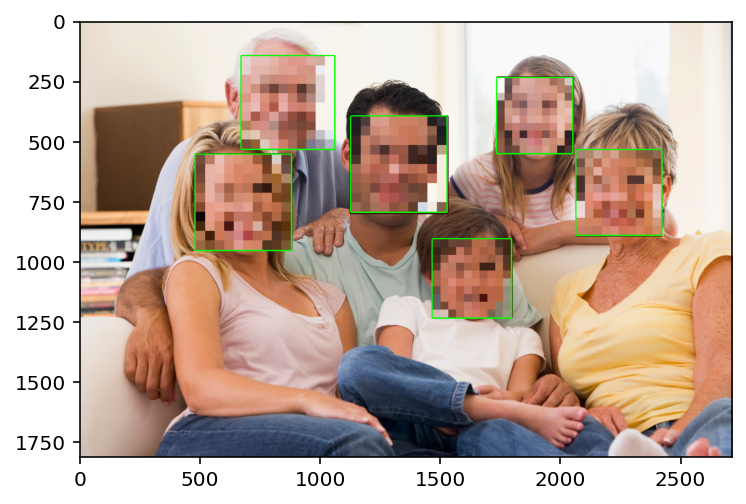

In [28]:
# 얼굴 부분만 모자이크 처리하기
for (x,y,w,h) in face_list:
    img = mosaic(img, (x, y, x+w, y+h), 10)

# 이미지 출력하기
# cv2.imwrite("family-mosaic.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()